In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("D://New folder//ML//Completed//Heart.csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [7]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768
std,9.049736,0.468500,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


Text(0.5, 1.0, 'Age-Cholesterol plot')

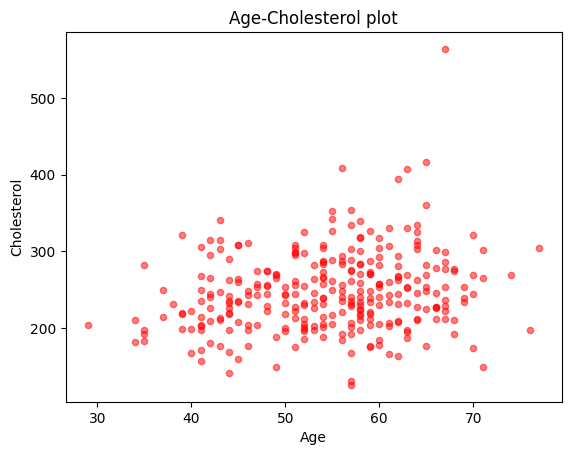

In [8]:
df.plot(kind='scatter', x='Age', y='Chol', alpha=0.5, color='red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol plot')

In [9]:
df_new = pd.get_dummies(df, columns=['ChestPain','Thal'], drop_first=True)

In [10]:
x = df_new.drop('AHD', axis=1)
y = df_new.AHD

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [12]:
ml = SVC()
para_grid = {
    'C' : [1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001],
    'kernel' : ['rbf']
}

grid = GridSearchCV(ml, para_grid, refit=True, verbose=1, cv=5, n_jobs=-1)
grid_search = grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [13]:
grid_search.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [14]:
accuracy = grid_search.best_score_
accuracy

0.675

In [15]:
y_test_hat = grid.predict(x_test)

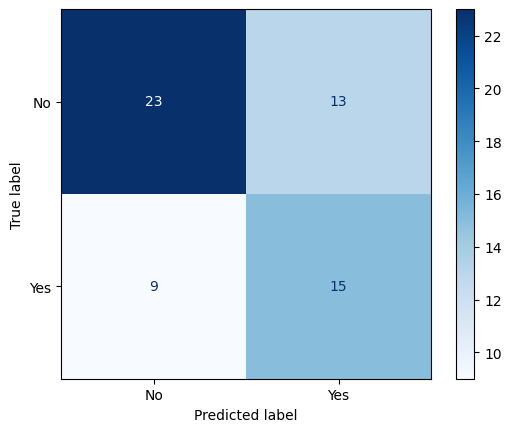

In [16]:
confusion_mat = confusion_matrix(y_test,y_test_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=grid.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

* The **plt.gca()** function in Matplotlib stands for "get current axis." It is used to retrieve the current Axes object from the current Figure. Essentially, it returns a reference to the currently active or existing set of axes in a plot.

In [17]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

          No       0.72      0.64      0.68        36
         Yes       0.54      0.62      0.58        24

    accuracy                           0.63        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.65      0.63      0.64        60

